#Examples of interactive coding

In [40]:
import antigravity

#Uncomment the following line to see how antigravity works
#??antigravity  

In [41]:
#Import the necessary function
from IPython.html.widgets import interact, fixed;

###Example 1:  Squaring a number 

In [42]:
def square_number(x):
    print(x**2)

In [43]:
interact(square_number,x=10);

100


###Example 2: Rending a string backwards

In [44]:
def backwards(my_string):
    print my_string[::-1]
    
interact(backwards, my_string="backwards");

sdrawkcab


###Example 3: A simple fuzzy matching algorithm 

In [45]:
from fuzzywuzzy import fuzz #The 'ratio' function is a kind of 'similarity score'

In [46]:
list_of_possible_matches = ["apple", "pear", "banana", "orange", "grapefruit", "lemon", "blueberry", "raspberry", "cherry"]

def fuzzy_match_against_list(term="", list_of_terms=[]):
    scores = [(fuzz.ratio(term,i),i) for i in list_of_terms]
    scores.sort(reverse=True)
    print "Best match is {} with a match ratio (score) of {:.0%}".format(scores[0][1], scores[0][0]/100.0)
    print "Full list in order of match quality: {}".format(([s[1] for s in scores]))

In [47]:
interact(fuzzy_match_against_list,term="berry",list_of_terms = fixed(list_of_possible_matches))  #'fixed', from IPython.html.widgets, can be used to set an argument that cannot be changed;

Best match is cherry with a match ratio (score) of 73%
Full list in order of match quality: ['cherry', 'raspberry', 'blueberry', 'pear', 'grapefruit', 'lemon', 'apple', 'orange', 'banana']


### Example 4:  Interactive charting demo in Python (i.e. charts generated in .png format by Python) 

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn styles for nice-looking plots.  Comment out the next line if you don't have seaborn installed
import seaborn; seaborn.set()

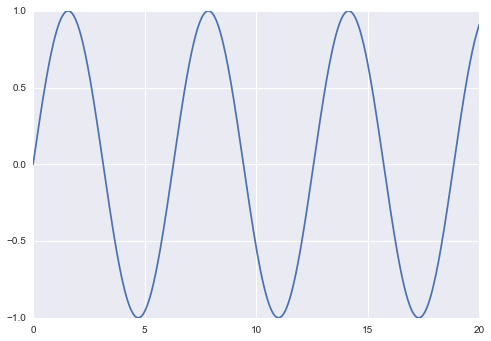

In [49]:
from IPython.html import widgets

def sin_plot(ratio=1):
    x = np.linspace(0, 20, 1000)  # 100 evenly-spaced values from 0 to 20
    y = np.sin(x*ratio)
    plt.plot(x,y)
    
interact(sin_plot,ratio=widgets.FloatSlider(min=0.01,max=3,step=0.01,value=1));

###Example 5:  Simulating a random walk

In [50]:
np.random.normal

<function normal>

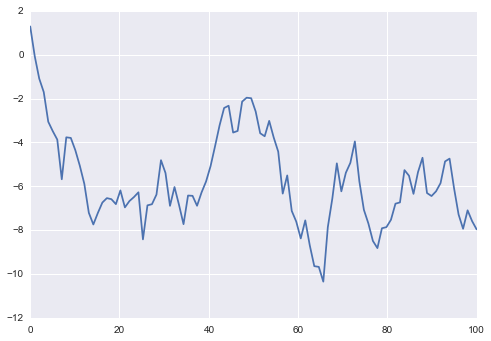

In [51]:
import numpy as np
def randomwalk(N=100):
    return np.cumsum(np.random.normal(0,1,N))

def rw_plot(points=100):
    y = randomwalk(N=points)
    x = np.linspace(0,points,points)
    plt.plot(x,y)

interact(rw_plot,points=widgets.IntSlider(min=1,max=10000,step=1,value=100));  

### Example 6: Simulating a regression model

Equation is of form $y = \alpha + \beta_1 x_1 + \beta_2x_1 + e$ with $e\sim  N(0,\sigma^2)$
 
Actual equation is $y = 5 + 2x_1 + 0.5x_2 + e$ with $e\sim  N(0,1)$

In [52]:
import pandas as pd
import statsmodels.formula.api as sm
from IPython.display import display

def sim_regression(num_points):
    df = pd.DataFrame(np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]], num_points), columns=['x1', 'x2', 'e'])
    df['y'] = 5 + 2*df['x1'] - 0.5*df['x2'] + df['e']

    result = sm.ols(formula="y ~ x1 + x2", data=df).fit()
    display(result.summary())
    
interact(sim_regression, num_points=widgets.IntSlider(min=3,max=1000,step=1,value=100))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     157.2
Date:                Sat, 26 Sep 2015   Prob (F-statistic):           3.68e-31
Time:                        16:14:30   Log-Likelihood:                -144.78
No. Observations:                 100   AIC:                             295.6
Df Residuals:                      97   BIC:                             303.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0067      0.105     47.726      0.000         4.799     5.215
x1             1.9764      0.113     17.446      0.000         1.752     2.201
x2            -0.4120      0.119     -3.471      0.001        -0.648    -0.176
==============================================================================
Omnibus:                        0.223   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.086
Skew:                           0.071   Prob(JB):                        0.958
Kurtosis:                       3.016   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function __main__.sim_regression>

### Example 7: Customised javascript visualisations

In [59]:
from IPython.display import Javascript
Javascript("""$.getScript('https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.6/d3.min.js')""")

<IPython.core.display.Javascript object>

In [65]:
js = """

var e = element.get(0)
var svg = d3.select(e).append("svg")
    .attr("height",400)
    .attr("width",2000)
    
var squares = {squares}

function my_sum(my_array) {{
    var sum = my_array.reduce(add, 0);
    function add(a, b) {{
        return Math.abs(a) + Math.abs(b);
    }}
    return sum
}}

var my_max = Math.max.apply(Math, squares);

var color = d3.scale.linear()
    .domain([0,my_max*3/4,my_max])
    .range(["red", "purple","blue"]);

svg.selectAll("hello")
    .data(squares)
    .enter()
    .append("rect")
    .attr("width",function(d) {{return Math.abs(d)}})
    .attr("height",function(d){{return Math.abs(d)}})
    .attr("fill", function(d) {{return color(Math.abs(d)) }})
    .attr("x", function(d,i){{return 10 + my_sum(squares.slice(0,i)) +i*5 }})
    .attr("y",function(d,i){{return 100 + d*2}})
"""

In [66]:
import math

def f(square_size, num_squares,step):

    squares = range(num_squares)
    
    squares = [math.sin(i/step)*square_size for i in squares]

    
    display(Javascript(js.format(squares=squares)))

interact(f,square_size=40,num_squares=30,step=10.0);

<IPython.core.display.Javascript object>